In [96]:
# Data Science Parichay provided tutorial with some tweaking on usage for counter trafficking use https://datascienceparichay.com/article/python-get-data-from-twitter-api-v2/import pandas as pd
# this program built while watching an incredible tutorial provided by The AI & DS Channel on Youtube found at https://www.youtube.com/watch?v=ng6L_wvREB4

import tweepy
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# your bearer token for tweepy
MY_BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAACzFgwEAAAAAcn3O8IrBNgFhsOxCsI1qtPChGmE%3DxX2AQv8LNj6PVICPJbU3pDuAS81H31FVwAoRT4KRygu8ToWicQ"
# create your client 
client = tweepy.Client(consumer_key="sRcgBg7wmscjeI69yYhVh7Eke",
    consumer_secret="TWqTlZOhcsipBSSFPH8vGuRJuH2CrWy7TDKZeghxS6pIYXoMrW",
    access_token="1568724885333229568-teDOO25JSzOJOBiwb9GumfwfYaw8OP",
    access_token_secret="fNzWqLOba6vMkweOoPO2qSUzzmH5xOaCSdusAo0eM7GEY")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CHRKEMP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CHRKEMP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [97]:
# query to search for tweets
query = "#ukraine lang:en -is:retweet"
# your start and end time for fetching tweets
start_time = "2022-10-16T00:00:00Z"
end_time = "2022-10-19T00:00:00Z"
# get tweets from the API
tweets = client.search_recent_tweets(query=query,
                                     start_time=start_time,
                                     end_time=end_time,
                                     tweet_fields = ["created_at", "text", "source"],
                                     user_fields = ["name", "username", "location", "verified", "description"],
                                     max_results = 75,
                                     expansions='author_id'
                                     ,user_auth=True
                                     )

In [98]:
# tweet specific info
print(len(tweets.data))
# user specific info
print(len(tweets.includes["users"]))

75
45


In [99]:
# first tweet
first_tweet = tweets.data[0]
dict(first_tweet)

{'created_at': datetime.datetime(2022, 10, 18, 23, 59, 51, tzinfo=datetime.timezone.utc),
 'author_id': 317650496,
 'text': 'Putin has redrawn his land bridge. The dam will be blown by Russia. #Ukraine',
 'id': 1582521875992784897,
 'source': 'Twitter for Android',
 'edit_history_tweet_ids': ['1582521875992784897']}

In [100]:
# user information for the first tweet
first_tweet_user = tweets.includes["users"][0]
dict(first_tweet_user)

{'username': 'Johnyrocket69',
 'description': 'Tracking weapons & battles tracking over 1,400 channels. tracking weapons & warcrimes in Syria & Ukraine. Veteran US Army \nBorn 1970, ILWU',
 'name': 'Johnny Six',
 'id': 317650496,
 'verified': False}

In [101]:
# import the pandas library
import pandas as pd
# create a list of records
tweet_info_ls = []
# iterate over each tweet and corresponding user details
for tweet, user in zip(tweets.data, tweets.includes['users']):
    tweet_info = {
        'created_at': tweet.created_at,
        'text': tweet.text,
        'source': tweet.source,
        'name': user.name,
        'username': user.username,
        'location': user.location,
        'verified': user.verified,
        'description': user.description
    }
    tweet_info_ls.append(tweet_info)
# create dataframe from the extracted records
tweets_df = pd.DataFrame(tweet_info_ls)
# display the dataframe
tweets_df.head()

,created_at,text,source,name,username,location,verified,description
0,2022-10-18 23:59:51+00:00,Putin has redrawn his land bridge. The dam wil...,Twitter for Android,Johnny Six,Johnyrocket69,None,False,"Tracking weapons & battles tracking over 1,400..."
1,2022-10-18 23:59:18+00:00,BRUTAL ATTACK!! Ukraine artillery units destro...,Twitter Web App,Poor Tech Guy,PoorTechguy,Ukraine,False,news writer
2,2022-10-18 23:59:15+00:00,@AlternativeVie7 @NATO_ACT @POTUS you say you ...,Twitter Web App,Kara Mate,KaraMate22,None,False,
3,2022-10-18 23:59:12+00:00,Novorosinform Reports:The #Russian armed Force...,Twitter Web App,Maurice Schleepen,MauriceSchleepe,World.,False,"News from the East,#Novorossia,#Russia and the..."
4,2022-10-18 23:59:04+00:00,@apiontkovsky he doesn't care about #Ukraine.\...,Twitter Web App,sokolworkx 🇺🇸🇺🇦,workinprogressh,"New York, NY",False,there is life outside twitter.\nI have an acut...


In [102]:
#export dataframe to csv file please be sure to use a file directory and title the csv file appropriately before running
tweets_df.to_csv(r'C:\Users\CHRKEMP\AppData\Local\Programs\Microsoft VS Code\Visual Code\Twitter\ukraine4.csv')

In [34]:
# this program built while watching an incredible tutorial provided by The AI & DS Channel on Youtube found at https://www.youtube.com/watch?v=ng6L_wvREB4
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CHRKEMP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CHRKEMP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [103]:
# import csv file from your computer into the prgram for analysis
df = pd.read_csv(r'C:\Users\CHRKEMP\AppData\Local\Programs\Microsoft VS Code\Visual Code\Twitter\ukraine4.csv')

In [104]:
#display the data in its entirety
df.head()

,Unnamed: 0,created_at,text,source,name,username,location,verified,description
0,0,2022-10-18 23:59:51+00:00,Putin has redrawn his land bridge. The dam wil...,Twitter for Android,Johnny Six,Johnyrocket69,NaN,False,"Tracking weapons & battles tracking over 1,400..."
1,1,2022-10-18 23:59:18+00:00,BRUTAL ATTACK!! Ukraine artillery units destro...,Twitter Web App,Poor Tech Guy,PoorTechguy,Ukraine,False,news writer
2,2,2022-10-18 23:59:15+00:00,@AlternativeVie7 @NATO_ACT @POTUS you say you ...,Twitter Web App,Kara Mate,KaraMate22,NaN,False,NaN
3,3,2022-10-18 23:59:12+00:00,Novorosinform Reports:The #Russian armed Force...,Twitter Web App,Maurice Schleepen,MauriceSchleepe,World.,False,"News from the East,#Novorossia,#Russia and the..."
4,4,2022-10-18 23:59:04+00:00,@apiontkovsky he doesn't care about #Ukraine.\...,Twitter Web App,sokolworkx 🇺🇸🇺🇦,workinprogressh,"New York, NY",False,there is life outside twitter.\nI have an acut...


In [105]:
#display the information about the data in its current form
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   45 non-null     int64 
 1   created_at   45 non-null     object
 2   text         45 non-null     object
 3   source       45 non-null     object
 4   name         45 non-null     object
 5   username     45 non-null     object
 6   location     31 non-null     object
 7   verified     45 non-null     bool  
 8   description  41 non-null     object
dtypes: bool(1), int64(1), object(7)
memory usage: 3.0+ KB


In [106]:
# display null fields of the data csv
df.isnull().sum()

Unnamed: 0      0
created_at      0
text            0
source          0
name            0
username        0
location       14
verified        0
description     4
dtype: int64

In [107]:
#display the column titles 
df.columns

Index(['Unnamed: 0', 'created_at', 'text', 'source', 'name', 'username',
       'location', 'verified', 'description'],
      dtype='object')

In [108]:
#drop irrelevent columns from the data
text_df = df.drop(['Unnamed: 0', 'created_at', 'source', 'name', 'username',
       'location', 'verified', 'description'], axis=1)
text_df.head()

,text
0,Putin has redrawn his land bridge. The dam wil...
1,BRUTAL ATTACK!! Ukraine artillery units destro...
2,@AlternativeVie7 @NATO_ACT @POTUS you say you ...
3,Novorosinform Reports:The #Russian armed Force...
4,@apiontkovsky he doesn't care about #Ukraine.\...


In [109]:
#display the text only outside column format
print(text_df['text'].iloc[0],'\"')
print(text_df['text'].iloc[1],'\"')
print(text_df['text'].iloc[2],'\"')
print(text_df['text'].iloc[3],'\"')
print(text_df['text'].iloc[4],'\"')

Putin has redrawn his land bridge. The dam will be blown by Russia. #Ukraine "
BRUTAL ATTACK!! Ukraine artillery units destroy 16 armored vehicles Russian army in Kherson
#Ukraine #Russia #USA #Europe #World
https://t.co/g1Ny6VfpFT "
@AlternativeVie7 @NATO_ACT @POTUS you say you stand with the people of #Ukraine but you push the #kremlin propaganda. https://t.co/VEp1XhvsxK "
Novorosinform Reports:The #Russian armed Forces liquidated,Destroyed all the military command and energy facilities of #Ukraine,designated during the day,Statement by the Russian Defense Ministry. https://t.co/lyvcNsWkoj "
@apiontkovsky he doesn't care about #Ukraine.
like he did not care about Crimea, and Donbass... "


In [110]:
#display the data that is remaining after dropping columns
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    45 non-null     object
dtypes: object(1)
memory usage: 488.0+ bytes


In [111]:
# remove the extra items from the data
def data_processing(text):
    text = text.lower()
    text == re.sub(r"https/S+|www/S+https/S+", '',text, flags=re.MULTILINE)
    text == re.sub(r'\@w+|\#','',text)
    text == re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [112]:
#call Function to remove the extra data
text_df.text = text_df['text'].apply(data_processing)

In [113]:
#Remove duplicate items in the data
text_df = text_df.drop_duplicates('text')

In [114]:
# define data stemmer
stemmer = PorterStemmer()
def stemming(data):
    text =[stemmer.stem(word) for word in data]
    return data

In [115]:
#function to call Data stemmer
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))

In [116]:
#display data after preprocessing data
text_df.head()

,text
0,putin redrawn land bridge . dam blown russia ....
1,brutal attack ! ! ukraine artillery units dest...
2,@ alternativevie7 @ nato_act @ potus say stand...
3,novorosinform reports : # russian armed forces...
4,@ apiontkovsky n't care # ukraine . like care ...


In [117]:
#dislplay only the text remaining
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

putin redrawn land bridge . dam blown russia . # ukraine 

brutal attack ! ! ukraine artillery units destroy 16 armored vehicles russian army kherson # ukraine # russia # usa # europe # world https : //t.co/g1ny6vfpft 

@ alternativevie7 @ nato_act @ potus say stand people # ukraine push # kremlin propaganda . https : //t.co/vep1xhvsxk 

novorosinform reports : # russian armed forces liquidated , destroyed military command energy facilities # ukraine , designated day , statement russian defense ministry . https : //t.co/lyvcnswkoj 

@ apiontkovsky n't care # ukraine . like care crimea , donbass ... 



In [118]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 44
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    45 non-null     object
dtypes: object(1)
memory usage: 720.0+ bytes


In [119]:
#define polarity from TextBlob libary
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [120]:
#call the function polarity from TextBlob
text_df['polarity'] = text_df['text'].apply(polarity)

In [121]:
#display the data after processing polarity
text_df.head(10)

,text,polarity
0,putin redrawn land bridge . dam blown russia ....,0.000000
1,brutal attack ! ! ukraine artillery units dest...,-0.400000
2,@ alternativevie7 @ nato_act @ potus say stand...,-0.100000
3,novorosinform reports : # russian armed forces...,-0.033333
4,@ apiontkovsky n't care # ukraine . like care ...,0.000000
5,air alert announced several regions center ukr...,-0.033333
6,@ meravmichaeli iran supplying rusia drones mi...,0.000000
7,@ tamarzandberg iran supplying rusia drones mi...,0.000000
8,'s real solution : stop nato proxy war # ukrai...,0.012500
9,@ nitzanhorowitz iran supplying rusia drones m...,0.000000


In [122]:
#define labels for the processed data for sentiment
def sentiment(label):
    if label<0:
        return"negative"    
    elif label==0:
        return"Neutral"
    elif label>0:
        return"positive"

In [123]:
#call function to display polarity and sentiment
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [124]:
#display the processed data with polarity and sentiment
text_df.head(20)

,text,polarity,sentiment
0,putin redrawn land bridge . dam blown russia ....,0.000000,Neutral
1,brutal attack ! ! ukraine artillery units dest...,-0.400000,negative
2,@ alternativevie7 @ nato_act @ potus say stand...,-0.100000,negative
3,novorosinform reports : # russian armed forces...,-0.033333,negative
4,@ apiontkovsky n't care # ukraine . like care ...,0.000000,Neutral
5,air alert announced several regions center ukr...,-0.033333,negative
6,@ meravmichaeli iran supplying rusia drones mi...,0.000000,Neutral
7,@ tamarzandberg iran supplying rusia drones mi...,0.000000,Neutral
8,'s real solution : stop nato proxy war # ukrai...,0.012500,positive
9,@ nitzanhorowitz iran supplying rusia drones m...,0.000000,Neutral


In [125]:
#save results of TextBlob analysis
tweets_df.to_csv(r'C:\Users\CHRKEMP\AppData\Local\Programs\Microsoft VS Code\Visual Code\Twitter\ukraine4A1.csv')

<AxesSubplot: xlabel='sentiment', ylabel='count'>

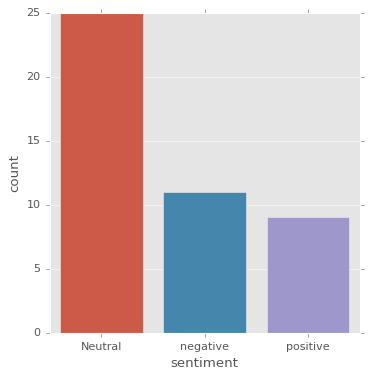

In [126]:
#display bar graph TextBlob Sentiment Analysis 
fig = plt.figure(figsize =(5,5))
sns.countplot(x ='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

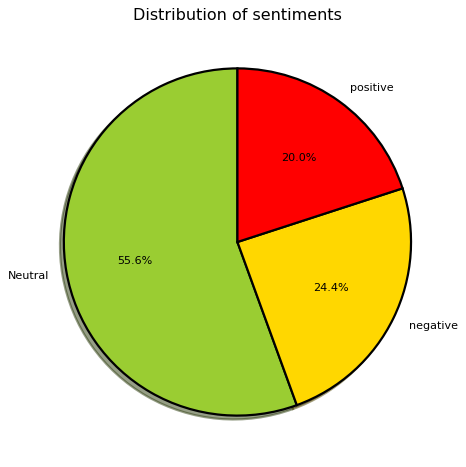

In [127]:
fig = plt.figure(figsize =(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor': "black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%',shadow=True, colors = colors, startangle=90, wedgeprops = wp,  label='')
plt.title('Distribution of sentiments')

In [128]:
#define Vader Sentiment Sentiment Intensity Analyzer
# of the sentence.
def sentiment_scores(text):
# Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
# polarity_scores method of SentimentIntensityAnalyzer
# oject gives a sentiment dictionary.
# which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(text)
    print("Overall sentiment dictionary is : ", sentiment_dict)
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
    print("Sentence Overall Rated As", end = " ")
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        print("Positive")
    elif sentiment_dict['compound'] <= - 0.05 :
        print("Negative")
    else :
        print("Neutral")

In [129]:
sid_obj = SentimentIntensityAnalyzer()
text_df['compound'] = [sid_obj.polarity_scores(x)['compound'] for x in df['text']]
text_df['neg'] = [sid_obj.polarity_scores(x)['neg'] for x in df['text']]
text_df['neu'] = [sid_obj.polarity_scores(x)['neu'] for x in df['text']]
text_df['pos'] = [sid_obj.polarity_scores(x)['pos'] for x in df['text']]

In [130]:
#display results of Sentiment Intensity Analyzer
text_df.head(20)

,text,polarity,sentiment,compound,neg,neu,pos
0,putin redrawn land bridge . dam blown russia ....,0.000000,Neutral,0.0000,0.000,1.000,0.000
1,brutal attack ! ! ukraine artillery units dest...,-0.400000,negative,-0.9294,0.443,0.557,0.000
2,@ alternativevie7 @ nato_act @ potus say stand...,-0.100000,negative,-0.3612,0.122,0.878,0.000
3,novorosinform reports : # russian armed forces...,-0.033333,negative,0.3818,0.000,0.859,0.141
4,@ apiontkovsky n't care # ukraine . like care ...,0.000000,Neutral,-0.4129,0.266,0.607,0.127
5,air alert announced several regions center ukr...,-0.033333,negative,0.2960,0.000,0.891,0.109
6,@ meravmichaeli iran supplying rusia drones mi...,0.000000,Neutral,-0.7579,0.183,0.737,0.079
7,@ tamarzandberg iran supplying rusia drones mi...,0.000000,Neutral,-0.7579,0.183,0.737,0.079
8,'s real solution : stop nato proxy war # ukrai...,0.012500,positive,-0.1531,0.168,0.673,0.158
9,@ nitzanhorowitz iran supplying rusia drones m...,0.000000,Neutral,-0.7579,0.183,0.737,0.079


In [131]:
#save results of Intensity analyzer
tweets_df.to_csv(r'C:\Users\CHRKEMP\AppData\Local\Programs\Microsoft VS Code\Visual Code\Twitter\ukraine4A.csv')

<AxesSubplot: xlabel='sentiment', ylabel='count'>

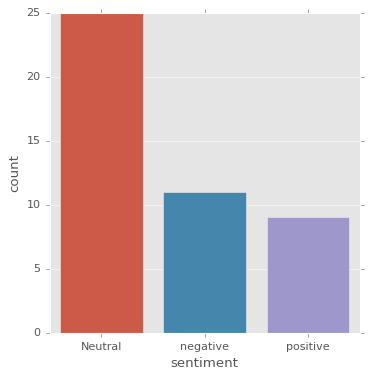

In [132]:
#display results in Bar Graph Vader Sentiment Intensity Analyzer
fig = plt.figure(figsize =(5,5))
sns.countplot(x ='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

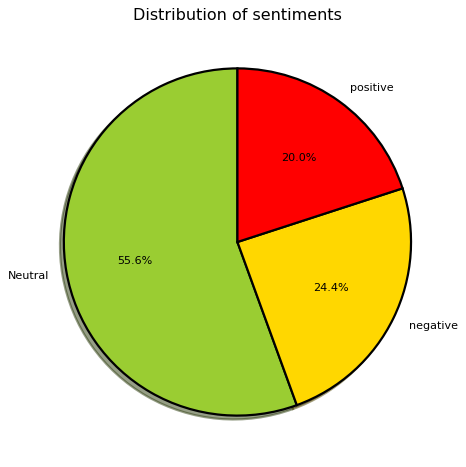

In [133]:
#display results Vader Sentiment Analyzer in pie graph
fig = plt.figure(figsize =(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor': "black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%',shadow=True, colors = colors, startangle=90, wedgeprops = wp,  label='')
plt.title('Distribution of sentiments')

In [134]:
#sift out positive sentiment from data pull
pos_tweets = text_df[text_df.sentiment == 'positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending = False)
pos_tweets.head()

,text,polarity,sentiment,compound,neg,neu,pos
35,best news israel ukraine ! even putin expect m...,0.600000,positive,0.6696,0.000,0.800,0.200
17,ukraine recaptures territory south north-east ...,0.500000,positive,0.0000,0.000,1.000,0.000
20,# ukraine # nazis define `` winning '' way # u...,0.500000,positive,0.0516,0.066,0.864,0.070
37,actions defending country # ukraine actually s...,0.266667,positive,0.1779,0.161,0.662,0.177
30,latest eu daily ! https : //t.co/mcaernoxsz th...,0.233333,positive,0.4926,0.000,0.790,0.210


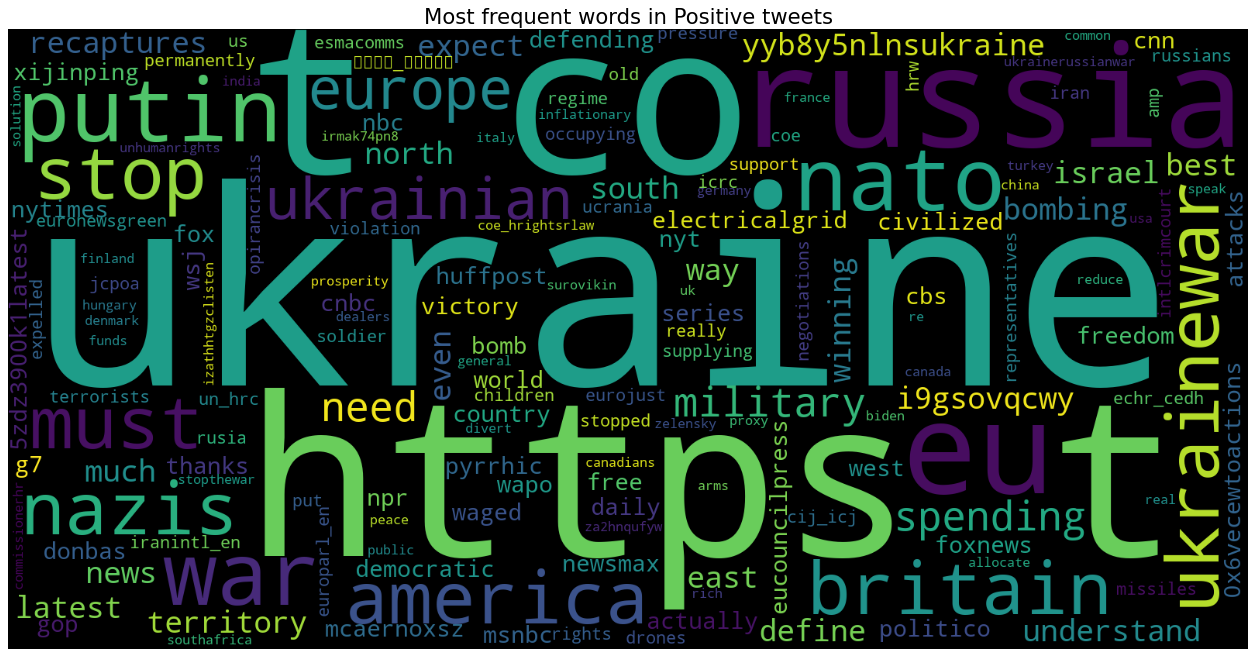

In [135]:
#display wordcloud of positive sentiment
text =''.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,25),facecolor= 'None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in Positive tweets', fontsize=19)
plt.show()

In [136]:
#sort out negative sentiment
neg_tweets = text_df[text_df.sentiment == 'negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending = False)
neg_tweets.head()

,text,polarity,sentiment,compound,neg,neu,pos
43,# ukrainewar # ukraine # russia 🌐 ukrainian de...,-0.007576,negative,-0.4404,0.096,0.866,0.039
3,novorosinform reports : # russian armed forces...,-0.033333,negative,0.3818,0.000,0.859,0.141
5,air alert announced several regions center ukr...,-0.033333,negative,0.2960,0.000,0.891,0.109
29,iran sends drone trainers crimea aid russian m...,-0.050000,negative,0.0000,0.000,1.000,0.000
2,@ alternativevie7 @ nato_act @ potus say stand...,-0.100000,negative,-0.3612,0.122,0.878,0.000


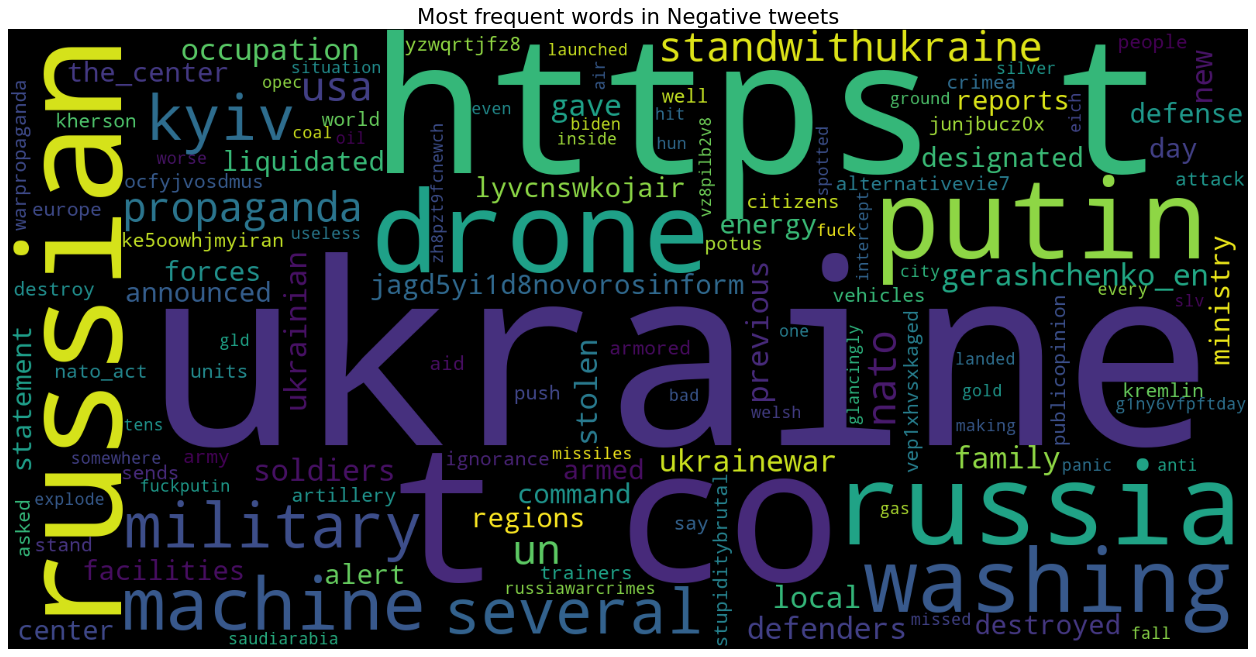

In [137]:
#display negative sentiment wordcloud
text =''.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,25),facecolor= 'None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in Negative tweets', fontsize=19)
plt.show()

In [138]:
#sort out neutral sentiment
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending = False)
neutral_tweets.head()

,text,polarity,sentiment,compound,neg,neu,pos
0,putin redrawn land bridge . dam blown russia ....,0.0,Neutral,0.0000,0.000,1.000,0.000
27,ukrainians protest islamic regime iran outside...,0.0,Neutral,-0.9325,0.286,0.714,0.000
42,@ apmassaro3 iranians stand # ukraine islamic ...,0.0,Neutral,-0.7506,0.186,0.760,0.054
41,@ jleighton22 @ apmassaro3 iranians stand # uk...,0.0,Neutral,-0.7506,0.182,0.766,0.053
40,@ johnmejdzor2021 @ apmassaro3 iranians stand ...,0.0,Neutral,-0.7506,0.182,0.766,0.053


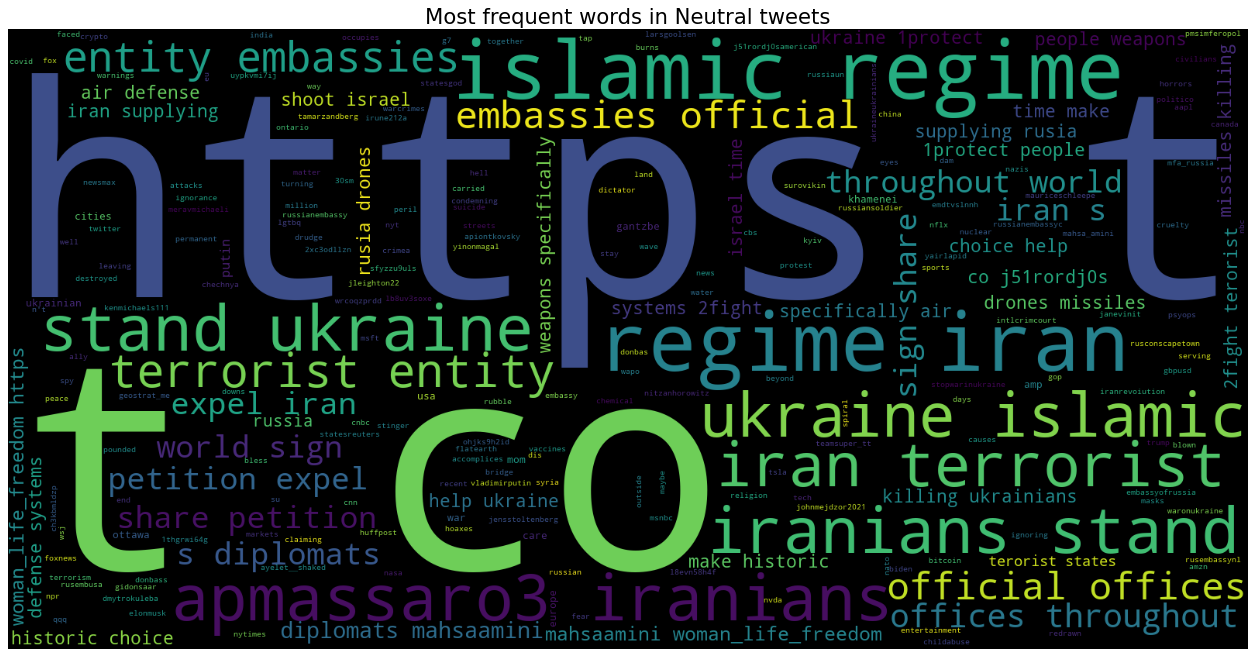

In [139]:
#display wordcloud of neurtral sentiment 
text =''.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,25),facecolor= 'None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in Neutral tweets', fontsize=19)
plt.show()

In [140]:
#All blocks below are testing points for accuracy within the processing 
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])

In [141]:
feature_names = vect.get_feature_names()
print("Number of features:{}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features:1090

First 20 features:
 ['0x6vecewto', '16', '16 armored', '1protect', '1protect people', '1thgrwi64g', '1thgrwi64g https', '2fight', '2fight terorist', '2xc3odllzn', '30', '30 million', '30sm', '30sm ukraine', '5zdz3900k1', 'aapl', 'aapl nvda', 'accomplices', 'accomplices intlcrimcourt', 'actions']


In [142]:
x = text_df['text']
y = text_df['sentiment']
x = vect.transform(x)

In [143]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [144]:
print("size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

size of x_train: (36, 1090)
Size of y_train: (36,)
Size of x_test: (9, 1090)
Size of y_test: (9,)


In [145]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 55.56%


In [146]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred ))

[[3 1 0]
 [1 1 0]
 [1 1 1]]


              precision    recall  f1-score   support

     Neutral       0.60      0.75      0.67         4
    negative       0.33      0.50      0.40         2
    positive       1.00      0.33      0.50         3

    accuracy                           0.56         9
   macro avg       0.64      0.53      0.52         9
weighted avg       0.67      0.56      0.55         9



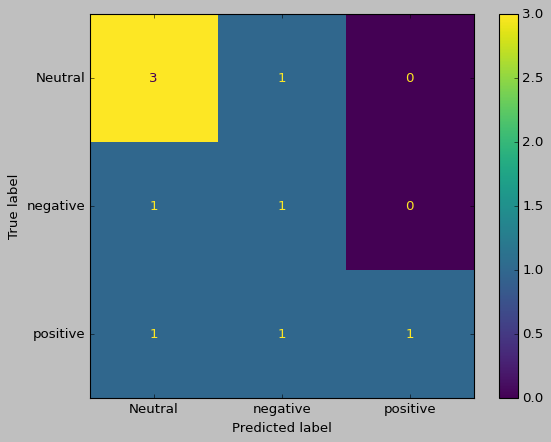

In [147]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [148]:
param_grid={'C':[0.001, 0.01, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 1, 10]})

In [149]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 1}


In [150]:
y_pred = grid.predict(x_test)

In [151]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 55.56%


In [152]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred ))

[[3 1 0]
 [1 1 0]
 [1 1 1]]


              precision    recall  f1-score   support

     Neutral       0.60      0.75      0.67         4
    negative       0.33      0.50      0.40         2
    positive       1.00      0.33      0.50         3

    accuracy                           0.56         9
   macro avg       0.64      0.53      0.52         9
weighted avg       0.67      0.56      0.55         9



In [153]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [154]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 55.56%


In [155]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[3 1 0]
 [1 1 0]
 [1 1 1]]


              precision    recall  f1-score   support

     Neutral       0.60      0.75      0.67         4
    negative       0.33      0.50      0.40         2
    positive       1.00      0.33      0.50         3

    accuracy                           0.56         9
   macro avg       0.64      0.53      0.52         9
weighted avg       0.67      0.56      0.55         9



In [156]:
grid = { 'C':[0.01, 0.1, 1, 10],'kernel':["linear", "poly","rbf","sigmoid"], 'degree':[1,3,5,7], 'gamma':[0.01,1]}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 1, 10]})

In [157]:
print("Best parameter:", grid.best_params_)

Best parameter: {'C': 1}


In [159]:
y_pred = grid.predict(x_test)

In [160]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy:{:.2f}%".format(logreg_acc*100))

Test accuracy:55.56%


In [161]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[3 1 0]
 [1 1 0]
 [1 1 1]]


              precision    recall  f1-score   support

     Neutral       0.60      0.75      0.67         4
    negative       0.33      0.50      0.40         2
    positive       1.00      0.33      0.50         3

    accuracy                           0.56         9
   macro avg       0.64      0.53      0.52         9
weighted avg       0.67      0.56      0.55         9



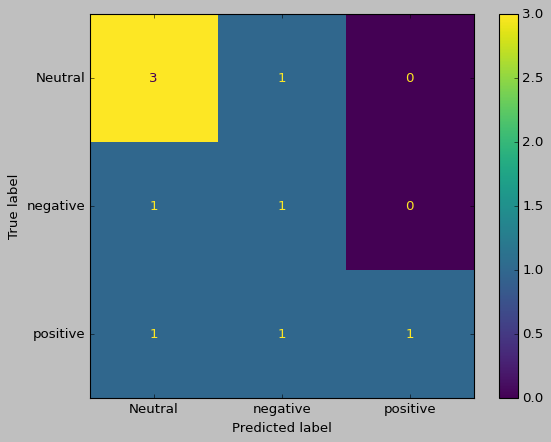

In [162]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()